In [6]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
from hydra import initialize, compose
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):  
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util
from mejiro.plots import corner

In [7]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, suppress_output=False)

pipeline_dir='/data/bwedig/mejiro/pipeline'


100%|██████████| 1175/1175 [00:13<00:00, 88.13it/s] 


In [10]:
high_snr = [l for l in all_lenses if l.snr > 50]  #  and l.get_einstein_radius() > 0.5
print(f'Count: {len(high_snr)}')

uids = [l.uid for l in high_snr]
snrs = [l.snr for l in high_snr]
pprint(f'{snrs=}')

color = [lens_util.get_sample(pipeline_dir, index=uid, rgb_bands=pipeline_params['rgb_bands'], model=False)[2] for uid in uids]

plot.rgb_plot_grid(color, side=np.floor(np.sqrt(len(high_snr))).astype(int))

Count: 111
('snrs=[80.62572252192368, 52.476648849897124, 74.405193559317, '
 '55.48598085188496, 55.948582513229255, 57.08381772770669, 53.19852344922999, '
 '51.61179129961795, 60.926606668402606, 58.70551219470234, 93.74075839245535, '
 '81.22165030925031, 90.04121854176954, 73.84490212265445, 73.59386904736427, '
 '67.82309125772652, 52.762007831782, 82.89431204873853, 54.33649690660315, '
 '59.91440391205041, 74.6118261030957, 57.842502203894284, 78.62396409542596, '
 '86.35163612754955, 55.387629550461575, 53.17086458982716, 58.69925228774135, '
 '66.29388915105174, 53.76842750401268, 87.42989879048339, 57.70816627256245, '
 '60.39567272963129, 52.06456157943473, 56.76469232402298, 80.29658734672891, '
 '74.00835177876907, 56.01060362555442, 153.5988345287139, 50.82863299687117, '
 '54.78074761067148, 124.0313198265659, 63.13220678377112, 50.14010053923336, '
 '75.47527404575237, 98.91917980956585, 55.45922179711128, 64.1459639761046, '
 '54.94395908408985, 86.22998778243047, 54.

IndexError: list index out of range

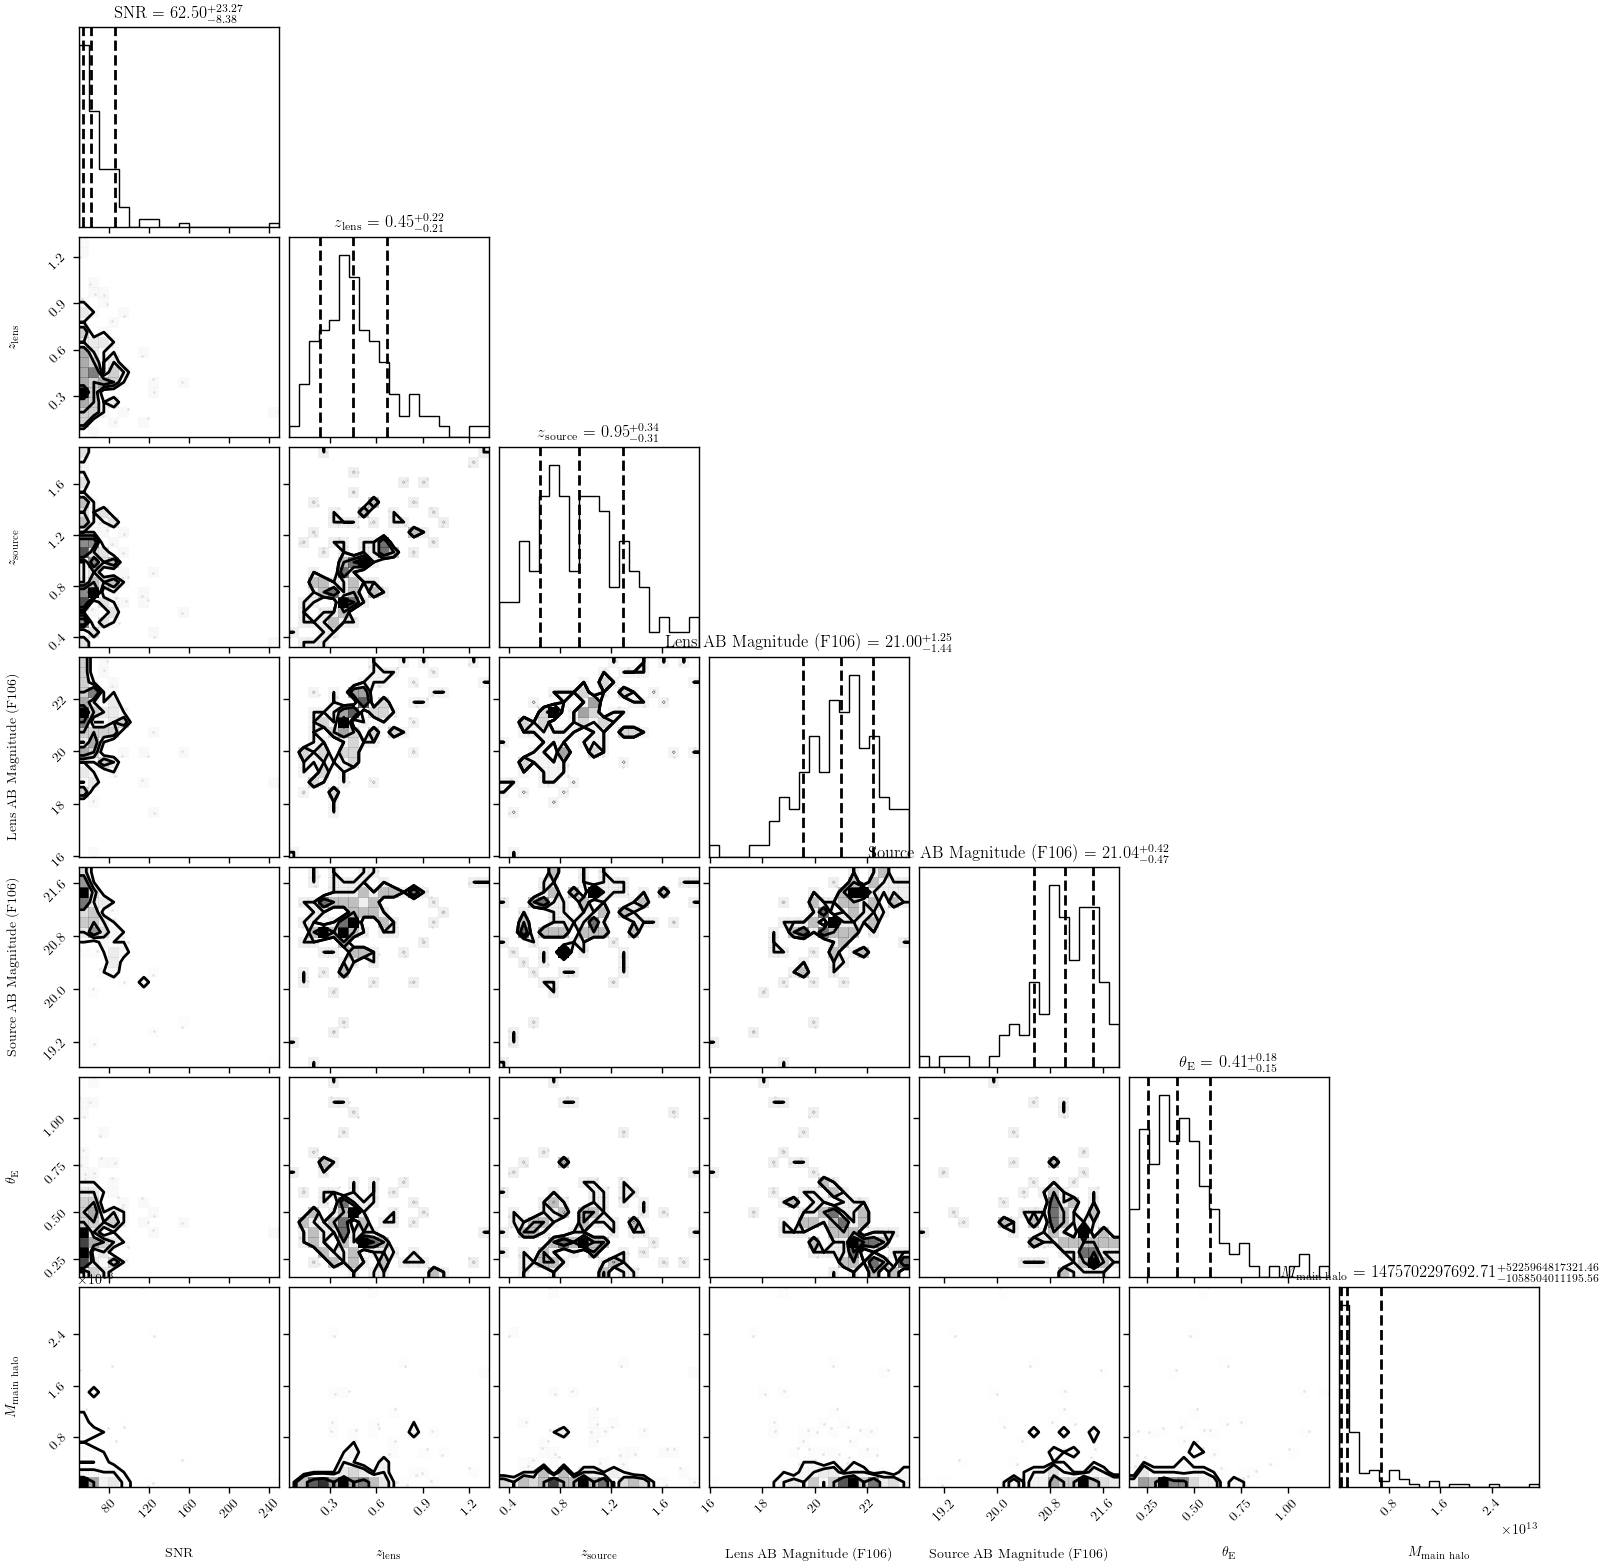

In [11]:
corner.system(high_snr, band='F106')